# MNIST Digit Classification Using Perceptron Learning Algorithm (PLA)

**Objective**:  
This notebook compares the performance of two variants of the Perceptron Learning Algorithm (PLA) on the MNIST digit classification task:
- **Clean PLA**: Standard perceptron without enhancements.
- **Pocket PLA**: Enhanced perceptron that stores the best-performing weights.

**Dataset**:  
- MNIST dataset (60,000 training samples and 10,000 test samples).
- Images normalized to range [0, 1] and bias term added.

**Evaluation Metrics**:  
- Confusion matrices
- Overall accuracy (ACC)
- Sensitivity (True Positive Rate - TPR) for each digit class
- Training and testing error curves for detailed iteration analysis

**Goals**:  
- Evaluate and compare model accuracy and robustness between Clean and Pocket PLA.
- Visualize and analyze model performance in depth.


In [1]:
%%capture run_output
%matplotlib inline
import sys
import os

# Assuming 'notebooks/' is one folder below your project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)

import numpy as np
import matplotlib.pyplot as plt

from core.logger.config import logger
from core.data.mnist_loader import load_mnist
from core.data.data_preprocessing import preprocess_data
from core.models.perceptron.multi_class_perceptron import MultiClassPerceptron
from core.analysis.evaluation_functions import evaluate_model
from core.analysis.plotting import plot_error_curves

# Define different max_iter values for testing
max_iter_values = [10, 20, 30, 50, 100]

# Ensure results directories exist
os.makedirs("results/perceptron_results/clean", exist_ok=True)
os.makedirs("results/perceptron_results/pocket", exist_ok=True)


## 1. Load and Preprocess the MNIST Dataset

We'll load the MNIST dataset using our custom loader (`mnist_loader`) and then apply preprocessing (`data_preprocessing`), which normalizes each image to [0,1] and adds a bias term.

In [2]:
from core.data.mnist_loader import load_mnist
from core.data.data_preprocessing import preprocess_data
# Load raw MNIST data (X: images, y: labels)
X_raw, y_raw = load_mnist()

print("Raw MNIST data shapes:")
print("X_raw:", X_raw.shape, "y_raw:", y_raw.shape)

# Preprocess (normalize & add bias = True)
X = preprocess_data(X_raw, add_bias=True, normalize=True)
print("Preprocessed shape:", X.shape)

# Split into train/test manually or with 60k/10k as the task suggests
X_train, y_train = X[:60000], y_raw[:60000]
X_test,  y_test  = X[60000:], y_raw[60000:]
print("Train set:", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape,  y_test.shape)


Raw MNIST data shapes:
X_raw: (70000, 784) y_raw: (70000,)
Preprocessed shape: (70000, 785)
Train set: (60000, 785) (60000,)
Test set:  (10000, 785) (10000,)


## 2. Train, Evaluate, and Plot Training Results

This section **trains, evaluates, and visualizes** the performance of **Clean PLA** and **Pocket PLA** across multiple values of `max_iter`.

### **Training and Evaluation Steps:**
1. **Train Models for Different Iterations (`max_iter`)**  
   - Train **Clean PLA** (standard Perceptron) and **Pocket PLA** (best-weight tracking variant).  
   - Store trained models for later analysis.  

2. **Assess Model Performance:**  
   - Compute **confusion matrices** to analyze per-class predictions.  
   - Calculate **overall accuracy (ACC)** and **average sensitivity (TPR)** for each model.  
   - Compare the effects of different `max_iter` values on classification results.  

3. **Analyze Training Behavior:**  
   - Plot **Accuracy vs. Max Iterations** to observe how training time affects accuracy.  
   - Plot **Runtime vs. Max Iterations** to understand computational efficiency tradeoffs.  

4. **Visualize Training Error Progression:**  
   - Aggregate **training error curves** from all digit classifiers.  
   - Compare how Clean vs. Pocket PLA models evolve across iterations.  
   - Identify potential **overfitting or plateau effects** in training.  

📌 **Goal:** Understand how iteration count (`max_iter`) impacts accuracy, runtime, and convergence speed while balancing training efficiency.


=== Training PLA with max_iter=10 ===
Training binary classifier for digit 0...
Training binary classifier for digit 1...
Training binary classifier for digit 2...
Training binary classifier for digit 3...
Training binary classifier for digit 4...
Training binary classifier for digit 5...
Training binary classifier for digit 6...
Training binary classifier for digit 7...
Training binary classifier for digit 8...
Training binary classifier for digit 9...
Training binary classifier for digit 0...
Training binary classifier for digit 1...
Training binary classifier for digit 2...
Training binary classifier for digit 3...
Training binary classifier for digit 4...
Training binary classifier for digit 5...
Training binary classifier for digit 6...
Training binary classifier for digit 7...
Training binary classifier for digit 8...
Training binary classifier for digit 9...
Training complete for max_iter=10
=== Training PLA with max_iter=20 ===
Training binary classifier for digit 0...
Training

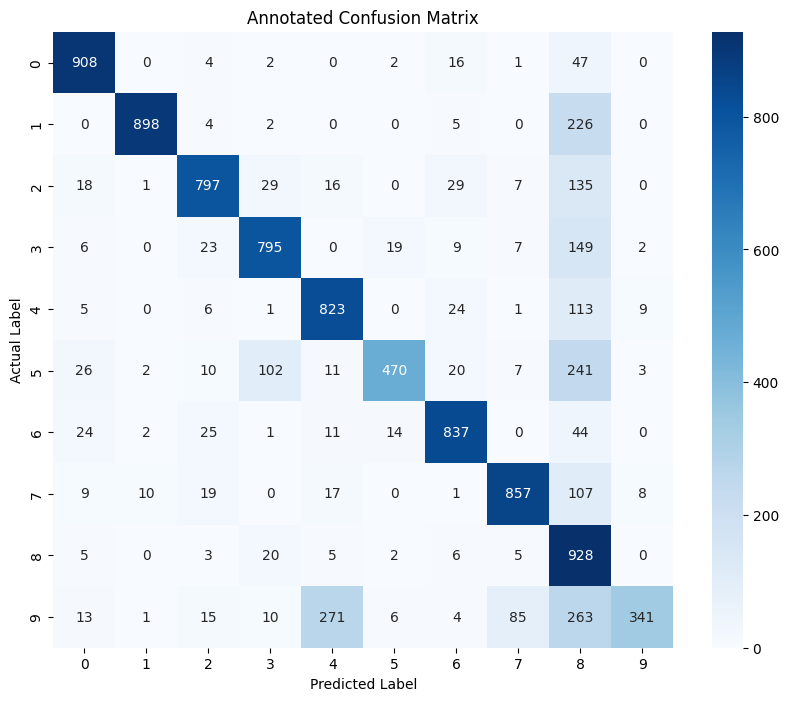

Built-in Confusion Matrix:
[[889   0  11   8   0  32  29   1  10   0]
 [  0 982  45  19   0   2   6   0  81   0]
 [ 15   1 880  44  13   0  30  13  36   0]
 [  5   0  32 881   0  29   9  14  36   4]
 [  3   3  10   6 852   4  40   4  33  27]
 [ 19   3  33 124  16 615  27  11  41   3]
 [ 21   3  33   2   8  23 860   0   8   0]
 [  8  16  47   1  14   0   1 906  22  13]
 [  3   1  28 102  10  33  13  17 764   3]
 [ 13   3  20  21 229  29   5 118  52 519]]
Custom Confusion Matrix:
[[889   0  11   8   0  32  29   1  10   0]
 [  0 982  45  19   0   2   6   0  81   0]
 [ 15   1 880  44  13   0  30  13  36   0]
 [  5   0  32 881   0  29   9  14  36   4]
 [  3   3  10   6 852   4  40   4  33  27]
 [ 19   3  33 124  16 615  27  11  41   3]
 [ 21   3  33   2   8  23 860   0   8   0]
 [  8  16  47   1  14   0   1 906  22  13]
 [  3   1  28 102  10  33  13  17 764   3]
 [ 13   3  20  21 229  29   5 118  52 519]]
Overall Accuracy: 81.48%
Sensitivity (TPR) for digit '0': 0.91
Sensitivity (TPR) for d

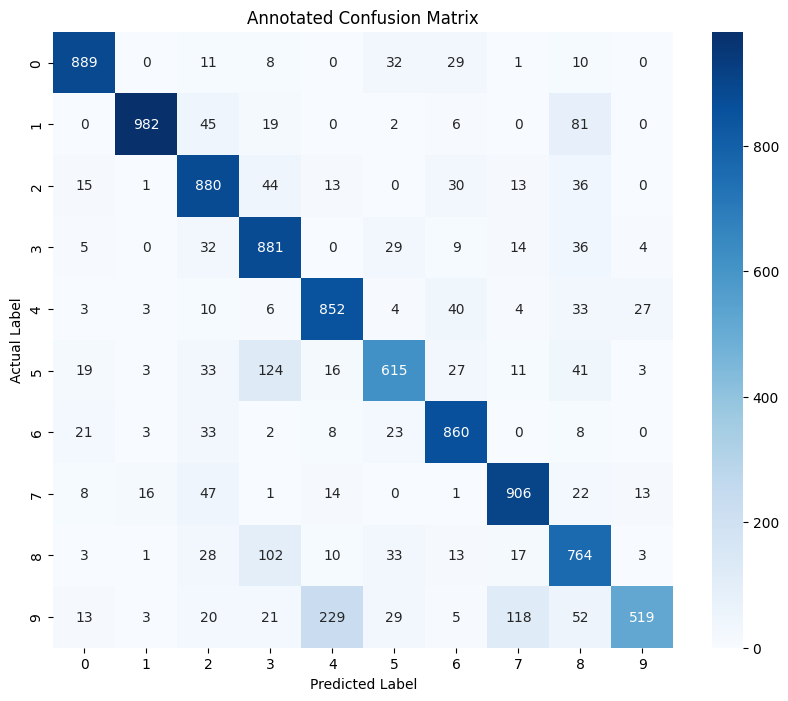

Evaluation complete for max_iter=10
=== Evaluating PLA with max_iter=20 ===
Built-in Confusion Matrix:
[[ 941    0    4    4    0   19   11    1    0    0]
 [   0 1066   31   17    1   16    4    0    0    0]
 [  20    6  899   38   19    5   26   17    2    0]
 [   8    1   31  901    1   40    7   19    0    2]
 [   4    7    8    3  908   15   23    5    2    7]
 [  33    6   13   73   19  716   21    8    0    3]
 [  22    5   14    2   10   26  879    0    0    0]
 [   7   23   49    6   10    1    4  923    0    5]
 [  12   17   93  181   14  471   25   32  121    8]
 [  18    9   27   22  293   80    5  174    0  381]]
Custom Confusion Matrix:
[[ 941    0    4    4    0   19   11    1    0    0]
 [   0 1066   31   17    1   16    4    0    0    0]
 [  20    6  899   38   19    5   26   17    2    0]
 [   8    1   31  901    1   40    7   19    0    2]
 [   4    7    8    3  908   15   23    5    2    7]
 [  33    6   13   73   19  716   21    8    0    3]
 [  22    5   14    2  

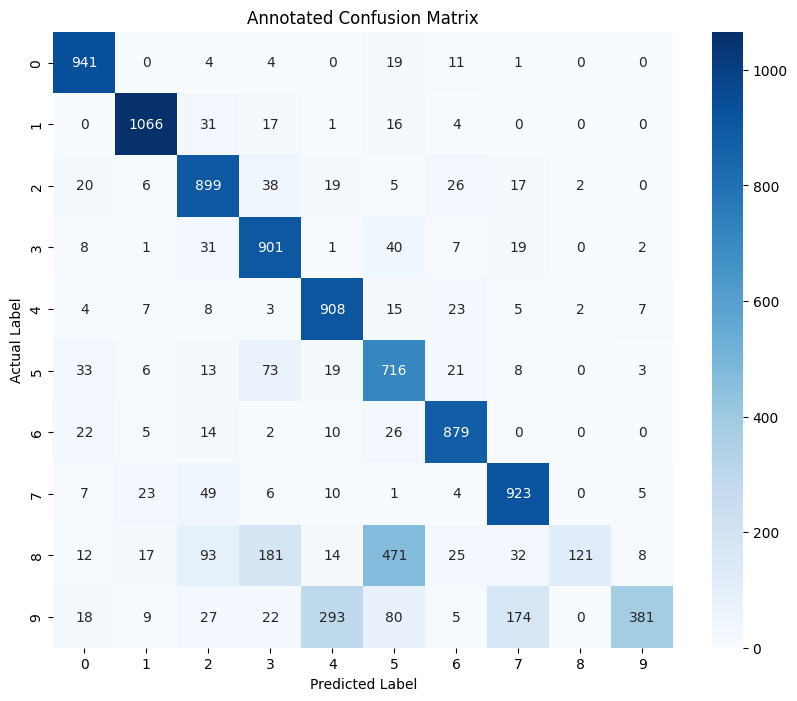

Built-in Confusion Matrix:
[[ 940    0    4    4    0   13   11    1    7    0]
 [   0 1062   19   14    1   14    4    0   21    0]
 [  20    6  880   33   19    2   26   17   29    0]
 [   8    1   28  895    1   38    7   17   13    2]
 [   4    6    7    4  903   15   23    5   12    3]
 [  33    6    9   73   17  696   19    8   29    2]
 [  22    4   14    2   10   25  876    0    5    0]
 [   7   23   46    7   10    0    4  921    5    5]
 [   9    5   24   72    5   68   16   17  758    0]
 [  19    8   27   19  237   75    4  138   36  446]]
Custom Confusion Matrix:
[[ 940    0    4    4    0   13   11    1    7    0]
 [   0 1062   19   14    1   14    4    0   21    0]
 [  20    6  880   33   19    2   26   17   29    0]
 [   8    1   28  895    1   38    7   17   13    2]
 [   4    6    7    4  903   15   23    5   12    3]
 [  33    6    9   73   17  696   19    8   29    2]
 [  22    4   14    2   10   25  876    0    5    0]
 [   7   23   46    7   10    0    4  921    5

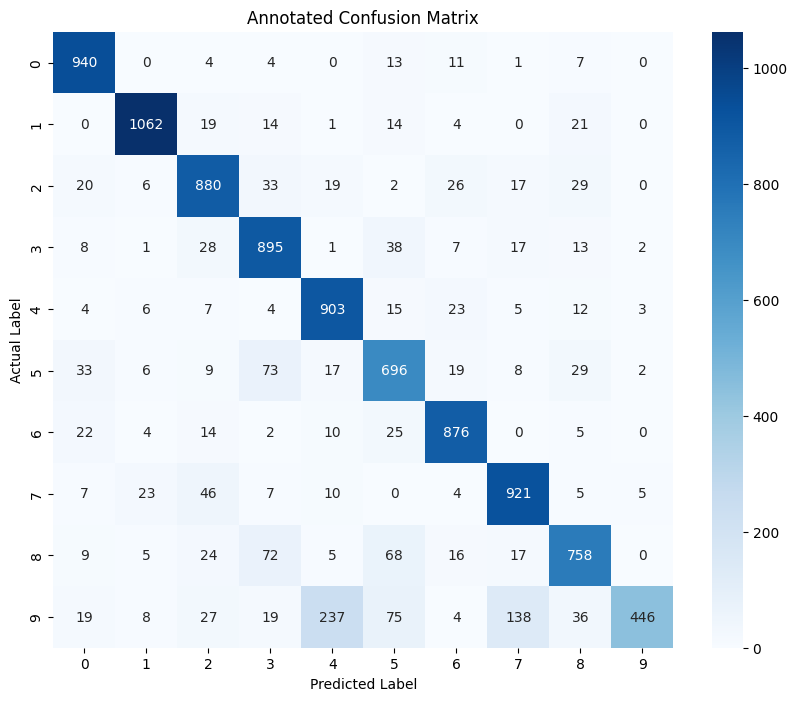

Evaluation complete for max_iter=20
=== Evaluating PLA with max_iter=30 ===
Built-in Confusion Matrix:
[[ 928    0    1    0    1    1    9    1   39    0]
 [   0 1034    3   15    0    1    4    0   78    0]
 [  16    5  819   22   15    0   19   12  124    0]
 [   7    0   18  873    1   14    7    8   81    1]
 [   3    2    7    2  867    0   16    1   77    7]
 [  23    4    6   70    7  495   16    7  262    2]
 [  19    2    8    2   11   12  864    0   40    0]
 [   6   14   30    3    8    0    3  912   48    4]
 [   3    1    4   14    4    3    4    3  938    0]
 [   9    3   19   18  153   15    1  101  289  401]]
Custom Confusion Matrix:
[[ 928    0    1    0    1    1    9    1   39    0]
 [   0 1034    3   15    0    1    4    0   78    0]
 [  16    5  819   22   15    0   19   12  124    0]
 [   7    0   18  873    1   14    7    8   81    1]
 [   3    2    7    2  867    0   16    1   77    7]
 [  23    4    6   70    7  495   16    7  262    2]
 [  19    2    8    2  

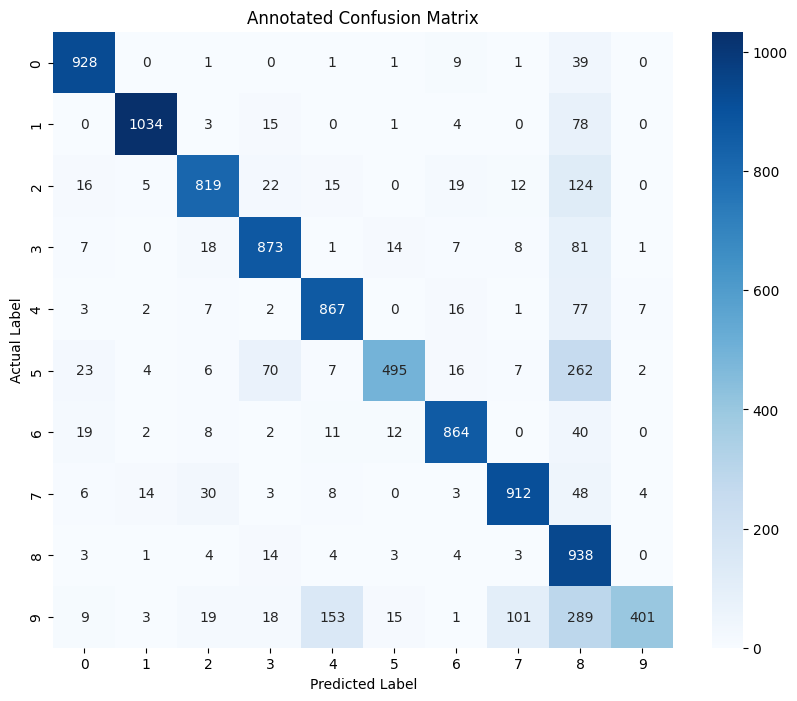

Built-in Confusion Matrix:
[[ 951    0    2    4    1    3   11    1    7    0]
 [   0 1066   18   20    1    7    4    0   19    0]
 [  16    7  886   29   18    2   22   18   32    2]
 [   7    0   23  921    1   24    7   12   14    1]
 [   3    3    8    4  916    3   17    3   15   10]
 [  28    6    9   90   17  663   21    8   47    3]
 [  19    3   10    3   11   18  884    0   10    0]
 [   6   16   49    6    9    0    3  930    5    4]
 [  11    5   19   62    4   40   12   16  805    0]
 [  12    6   26   31  209   34    2  128   33  528]]
Custom Confusion Matrix:
[[ 951    0    2    4    1    3   11    1    7    0]
 [   0 1066   18   20    1    7    4    0   19    0]
 [  16    7  886   29   18    2   22   18   32    2]
 [   7    0   23  921    1   24    7   12   14    1]
 [   3    3    8    4  916    3   17    3   15   10]
 [  28    6    9   90   17  663   21    8   47    3]
 [  19    3   10    3   11   18  884    0   10    0]
 [   6   16   49    6    9    0    3  930    5

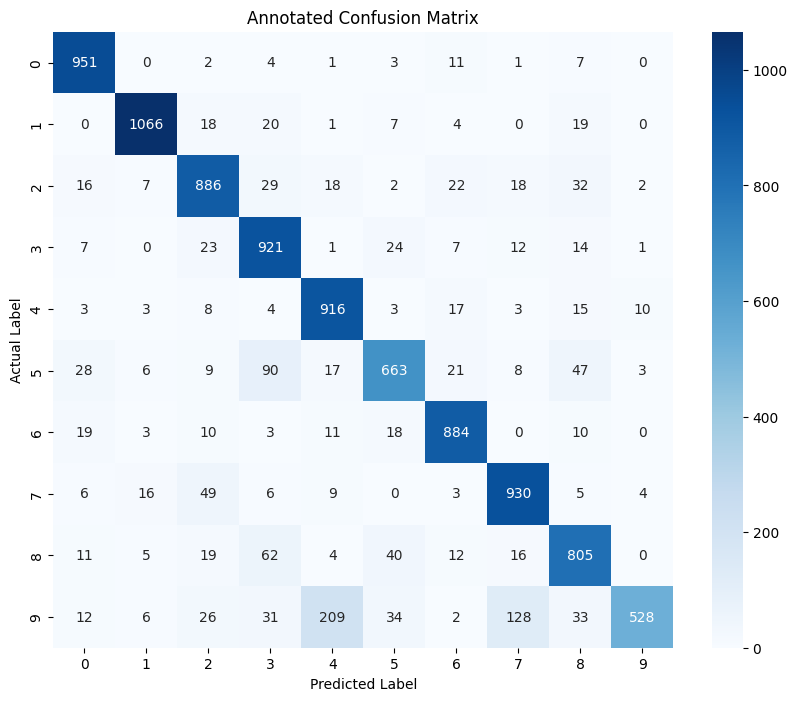

Evaluation complete for max_iter=30
=== Evaluating PLA with max_iter=50 ===
Built-in Confusion Matrix:
[[ 959    0    3    6    1    0    7    1    3    0]
 [   0 1077   18   23    1    0    4    2   10    0]
 [   9    7  912   26   16    0   20   20   19    3]
 [   6    0   20  955    1    4    4   13    6    1]
 [   1    0    8    7  933    0   14    2    4   13]
 [  33    6   15  169   42  526   27   18   45   11]
 [  19    3    9    7   11    3  905    0    1    0]
 [   6   13   44   13    9    0    2  936    0    5]
 [  18    7   39  137   18    8   18   23  704    2]
 [  13    8   23   47  174    5    0   98    3  638]]
Custom Confusion Matrix:
[[ 959    0    3    6    1    0    7    1    3    0]
 [   0 1077   18   23    1    0    4    2   10    0]
 [   9    7  912   26   16    0   20   20   19    3]
 [   6    0   20  955    1    4    4   13    6    1]
 [   1    0    8    7  933    0   14    2    4   13]
 [  33    6   15  169   42  526   27   18   45   11]
 [  19    3    9    7  

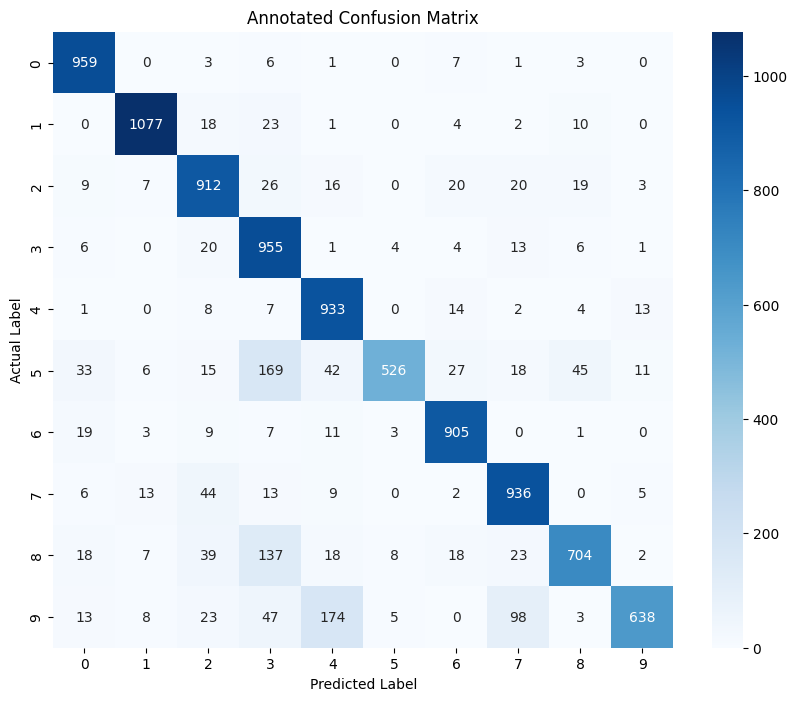

Built-in Confusion Matrix:
[[ 956    0    3    3    1    0    6    1   10    0]
 [   0 1075   14   18    1    2    4    1   20    0]
 [   9    5  901   21   15    0   18   18   42    3]
 [   6    0   20  928    1   17    4   12   21    1]
 [   1    0    8    6  924    1   13    2   13   14]
 [  20    4    9   88   20  653   20   10   64    4]
 [  16    3    7    5   11   12  892    0   12    0]
 [   5   12   44   11    8    0    2  934    5    7]
 [  11    3   19   58    7   16    9   14  837    0]
 [  12    7   21   31  149   17    0   83   36  653]]
Custom Confusion Matrix:
[[ 956    0    3    3    1    0    6    1   10    0]
 [   0 1075   14   18    1    2    4    1   20    0]
 [   9    5  901   21   15    0   18   18   42    3]
 [   6    0   20  928    1   17    4   12   21    1]
 [   1    0    8    6  924    1   13    2   13   14]
 [  20    4    9   88   20  653   20   10   64    4]
 [  16    3    7    5   11   12  892    0   12    0]
 [   5   12   44   11    8    0    2  934    5

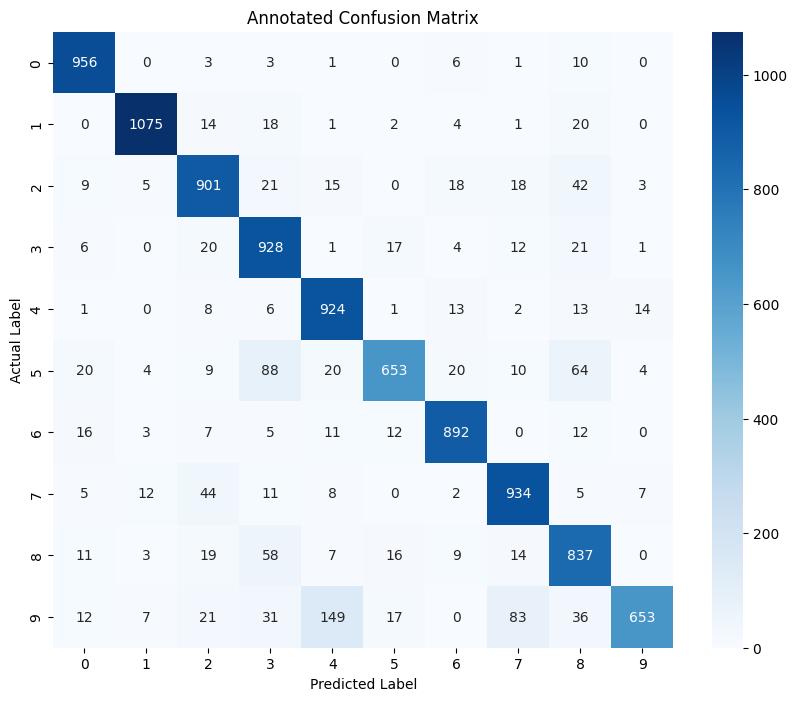

Evaluation complete for max_iter=50
=== Evaluating PLA with max_iter=100 ===
Built-in Confusion Matrix:
[[ 964    0    3    2    1    1    6    2    1    0]
 [   0 1107   10    6    0    2    5    2    3    0]
 [  18   12  914    9   13    1   23   20   15    7]
 [  12    1   26  910    2   20    6   18    3   12]
 [   2    1    5    0  930    0   11    3    2   28]
 [  25    6   13   44   33  703   30   18    8   12]
 [  12    3    5    2   10    6  920    0    0    0]
 [   5    8   29    5    7    0    2  951    0   21]
 [  30   14  105   81   59   44   29   32  542   38]
 [  12    7   10   17   93    5    1   60    0  804]]
Custom Confusion Matrix:
[[ 964    0    3    2    1    1    6    2    1    0]
 [   0 1107   10    6    0    2    5    2    3    0]
 [  18   12  914    9   13    1   23   20   15    7]
 [  12    1   26  910    2   20    6   18    3   12]
 [   2    1    5    0  930    0   11    3    2   28]
 [  25    6   13   44   33  703   30   18    8   12]
 [  12    3    5    2 

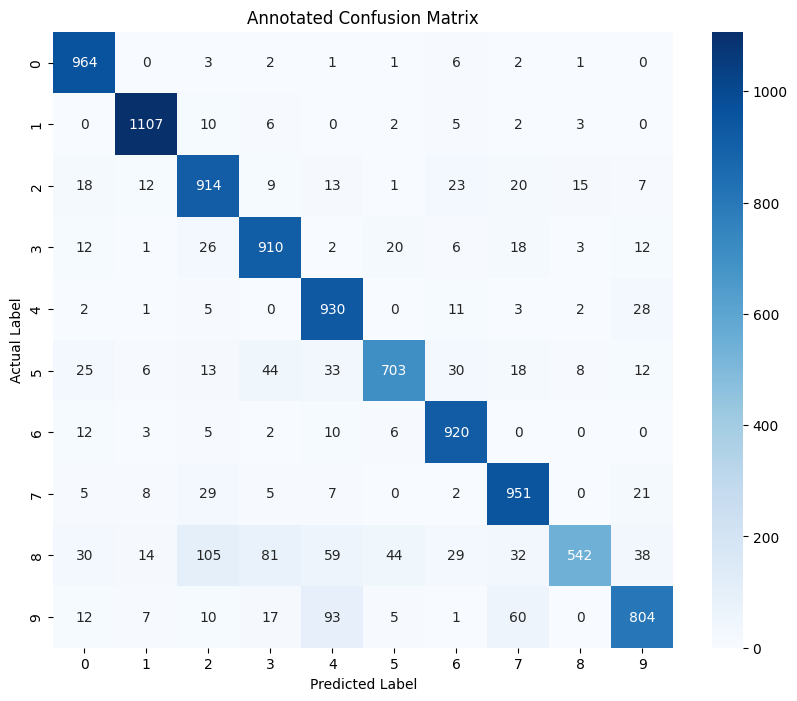

Built-in Confusion Matrix:
[[ 963    0    3    3    1    0    5    2    3    0]
 [   0 1097    9    6    0    1    4    1   17    0]
 [   8    3  906   20   12    0   16   17   43    7]
 [   6    0   21  921    1   18    4   13   19    7]
 [   2    0    8    2  916    1    9    2   11   31]
 [  21    4   10   65   24  664   22   14   58   10]
 [  12    3    9    3   10    7  909    0    5    0]
 [   5    7   32    9    6    0    2  943    2   22]
 [  13    3   24   51   14   12   14   17  821    5]
 [  10    7   11   20   70   10    0   46   11  824]]
Custom Confusion Matrix:
[[ 963    0    3    3    1    0    5    2    3    0]
 [   0 1097    9    6    0    1    4    1   17    0]
 [   8    3  906   20   12    0   16   17   43    7]
 [   6    0   21  921    1   18    4   13   19    7]
 [   2    0    8    2  916    1    9    2   11   31]
 [  21    4   10   65   24  664   22   14   58   10]
 [  12    3    9    3   10    7  909    0    5    0]
 [   5    7   32    9    6    0    2  943    2

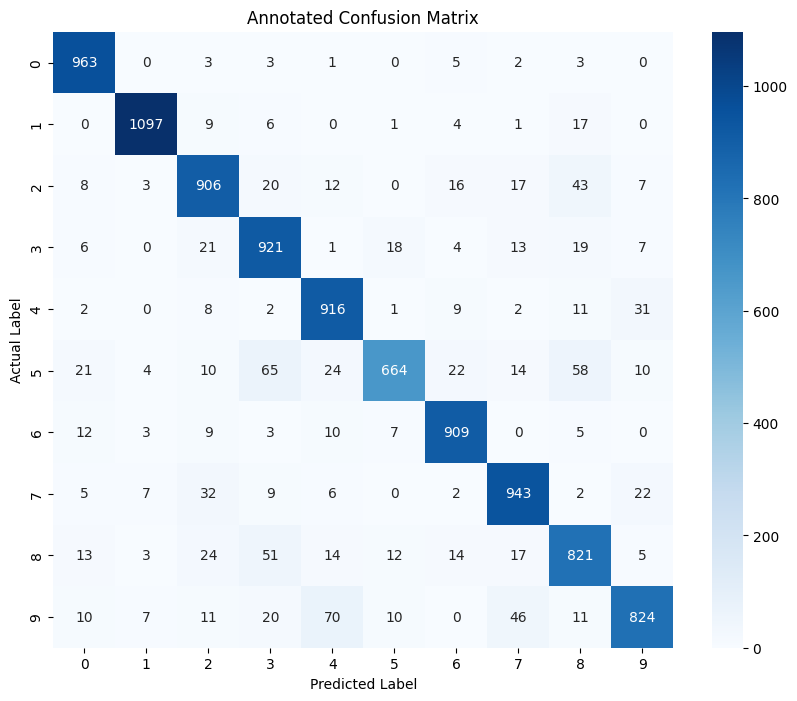

Evaluation complete for max_iter=100


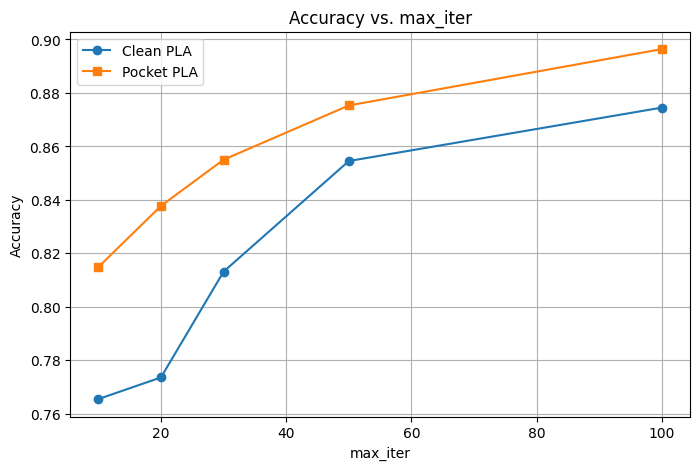

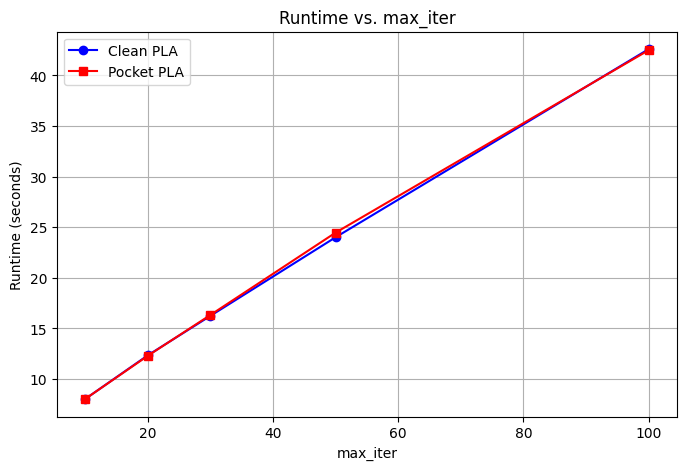

Plotted accuracy and runtime vs max_iter.


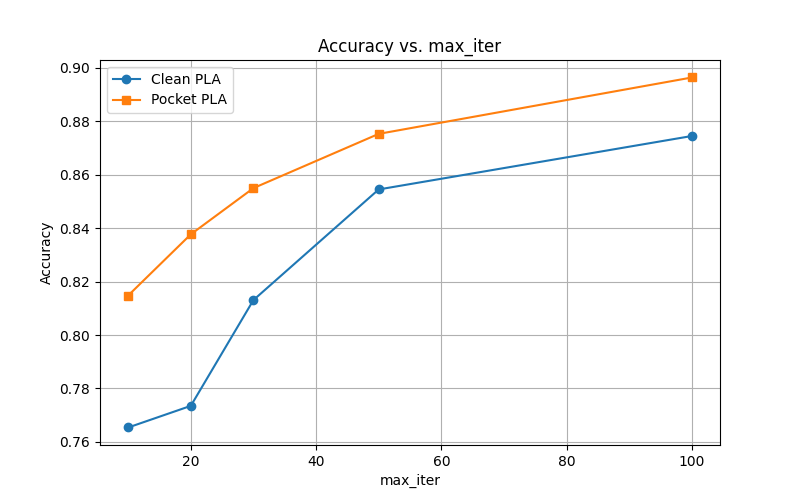

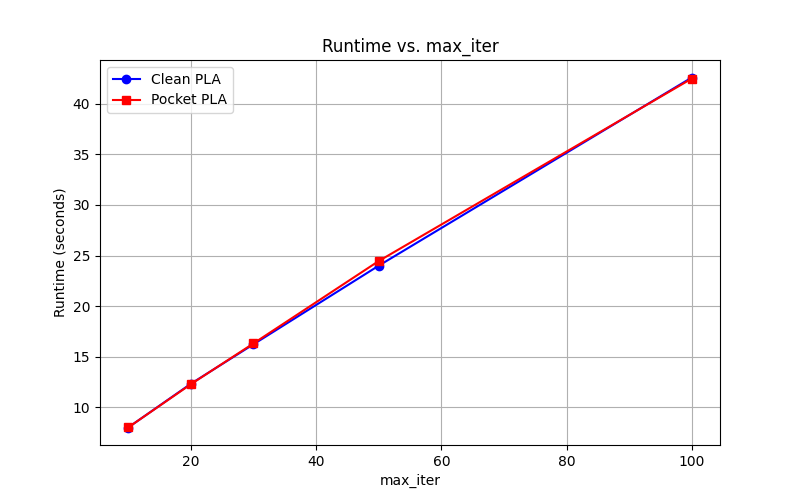

In [3]:
## 2. Train, Evaluate, and Plot Training Results
import os
import numpy as np
from core.models.perceptron.multi_class_perceptron import MultiClassPerceptron
from core.analysis.evaluation_functions import evaluate_model
from core.analysis.plotting import (
    plot_accuracy_vs_max_iter, 
    plot_runtime_vs_max_iter
)
from IPython.display import display
from PIL import Image

# Dictionaries to store trained models
trained_models_clean = {}
trained_models_pocket = {}

# Lists to store accuracy, runtime, and sensitivity results
accuracies_clean = []
accuracies_pocket = []
runtimes_clean = []
runtimes_pocket = []
sensitivities_clean = []
sensitivities_pocket = []

# Ensure results directory exists
os.makedirs("results/perceptron_results", exist_ok=True)

# ========== Train Clean and Pocket PLA for different max_iter values ==========
for max_iter in max_iter_values:
    print(f"=== Training PLA with max_iter={max_iter} ===")

    # Train Clean PLA
    clean_perceptron = MultiClassPerceptron(num_classes=10, max_iter=max_iter, use_pocket=False)
    clean_perceptron.fit(X_train, y_train)
    trained_models_clean[max_iter] = clean_perceptron

    # Train Pocket PLA
    pocket_perceptron = MultiClassPerceptron(num_classes=10, max_iter=max_iter, use_pocket=True)
    pocket_perceptron.fit(X_train, y_train)
    trained_models_pocket[max_iter] = pocket_perceptron

    print(f"Training complete for max_iter={max_iter}")

# ========== Evaluate Models ==========
for max_iter in max_iter_values:
    print(f"=== Evaluating PLA with max_iter={max_iter} ===")

    # Ensure directories exist
    plot_dir_clean = f"results/clean_{max_iter}"
    plot_dir_pocket = f"results/pocket_{max_iter}"
    os.makedirs(plot_dir_clean, exist_ok=True)
    os.makedirs(plot_dir_pocket, exist_ok=True)

    # Retrieve trained models
    clean_perceptron = trained_models_clean[max_iter]
    pocket_perceptron = trained_models_pocket[max_iter]

    # Evaluate Clean PLA
    _, acc_clean, sens_clean, _ = evaluate_model(clean_perceptron, X_test, y_test, classes=list(range(10)), plot_dir=plot_dir_clean)
    accuracies_clean.append(acc_clean)
    sensitivities_clean.append(np.mean(sens_clean))  # Store mean sensitivity
    runtimes_clean.append(clean_perceptron.training_runtime)

    # Evaluate Pocket PLA
    _, acc_pocket, sens_pocket, _ = evaluate_model(pocket_perceptron, X_test, y_test, classes=list(range(10)), plot_dir=plot_dir_pocket)
    accuracies_pocket.append(acc_pocket)
    sensitivities_pocket.append(np.mean(sens_pocket))  # Store mean sensitivity
    runtimes_pocket.append(pocket_perceptron.training_runtime)

    print(f"Evaluation complete for max_iter={max_iter}")

# ========== Plot Accuracy and Runtime vs. Max Iterations ==========
plot_accuracy_vs_max_iter(
    max_iter_values,
    accuracies_clean,
    accuracies_pocket,
    save_path="results/accuracy_vs_max_iter.png"
)

plot_runtime_vs_max_iter(
    max_iter_values,
    runtimes_clean,
    runtimes_pocket,
    save_path="results/runtime_vs_max_iter.png"
)

print("Plotted accuracy and runtime vs max_iter.")

# ================== Display Accuracy and Runtime Plots in Notebook ==================
display(Image.open("results/accuracy_vs_max_iter.png"))
display(Image.open("results/runtime_vs_max_iter.png"))


## 3. Visualize Training Error Curves

Each digit-specific classifier within `MultiClassPerceptron` stores iteration-level training errors. We'll **aggregate** them across all digits to create an average training curve. This provides a high-level overview of how the algorithm's error evolves over time.


=== Plotting Average Training Curves for Clean vs Pocket PLA ===


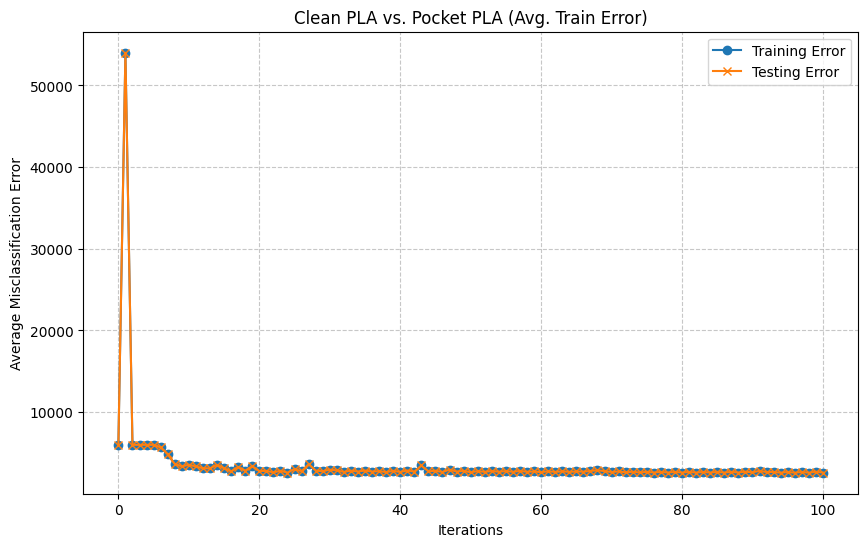

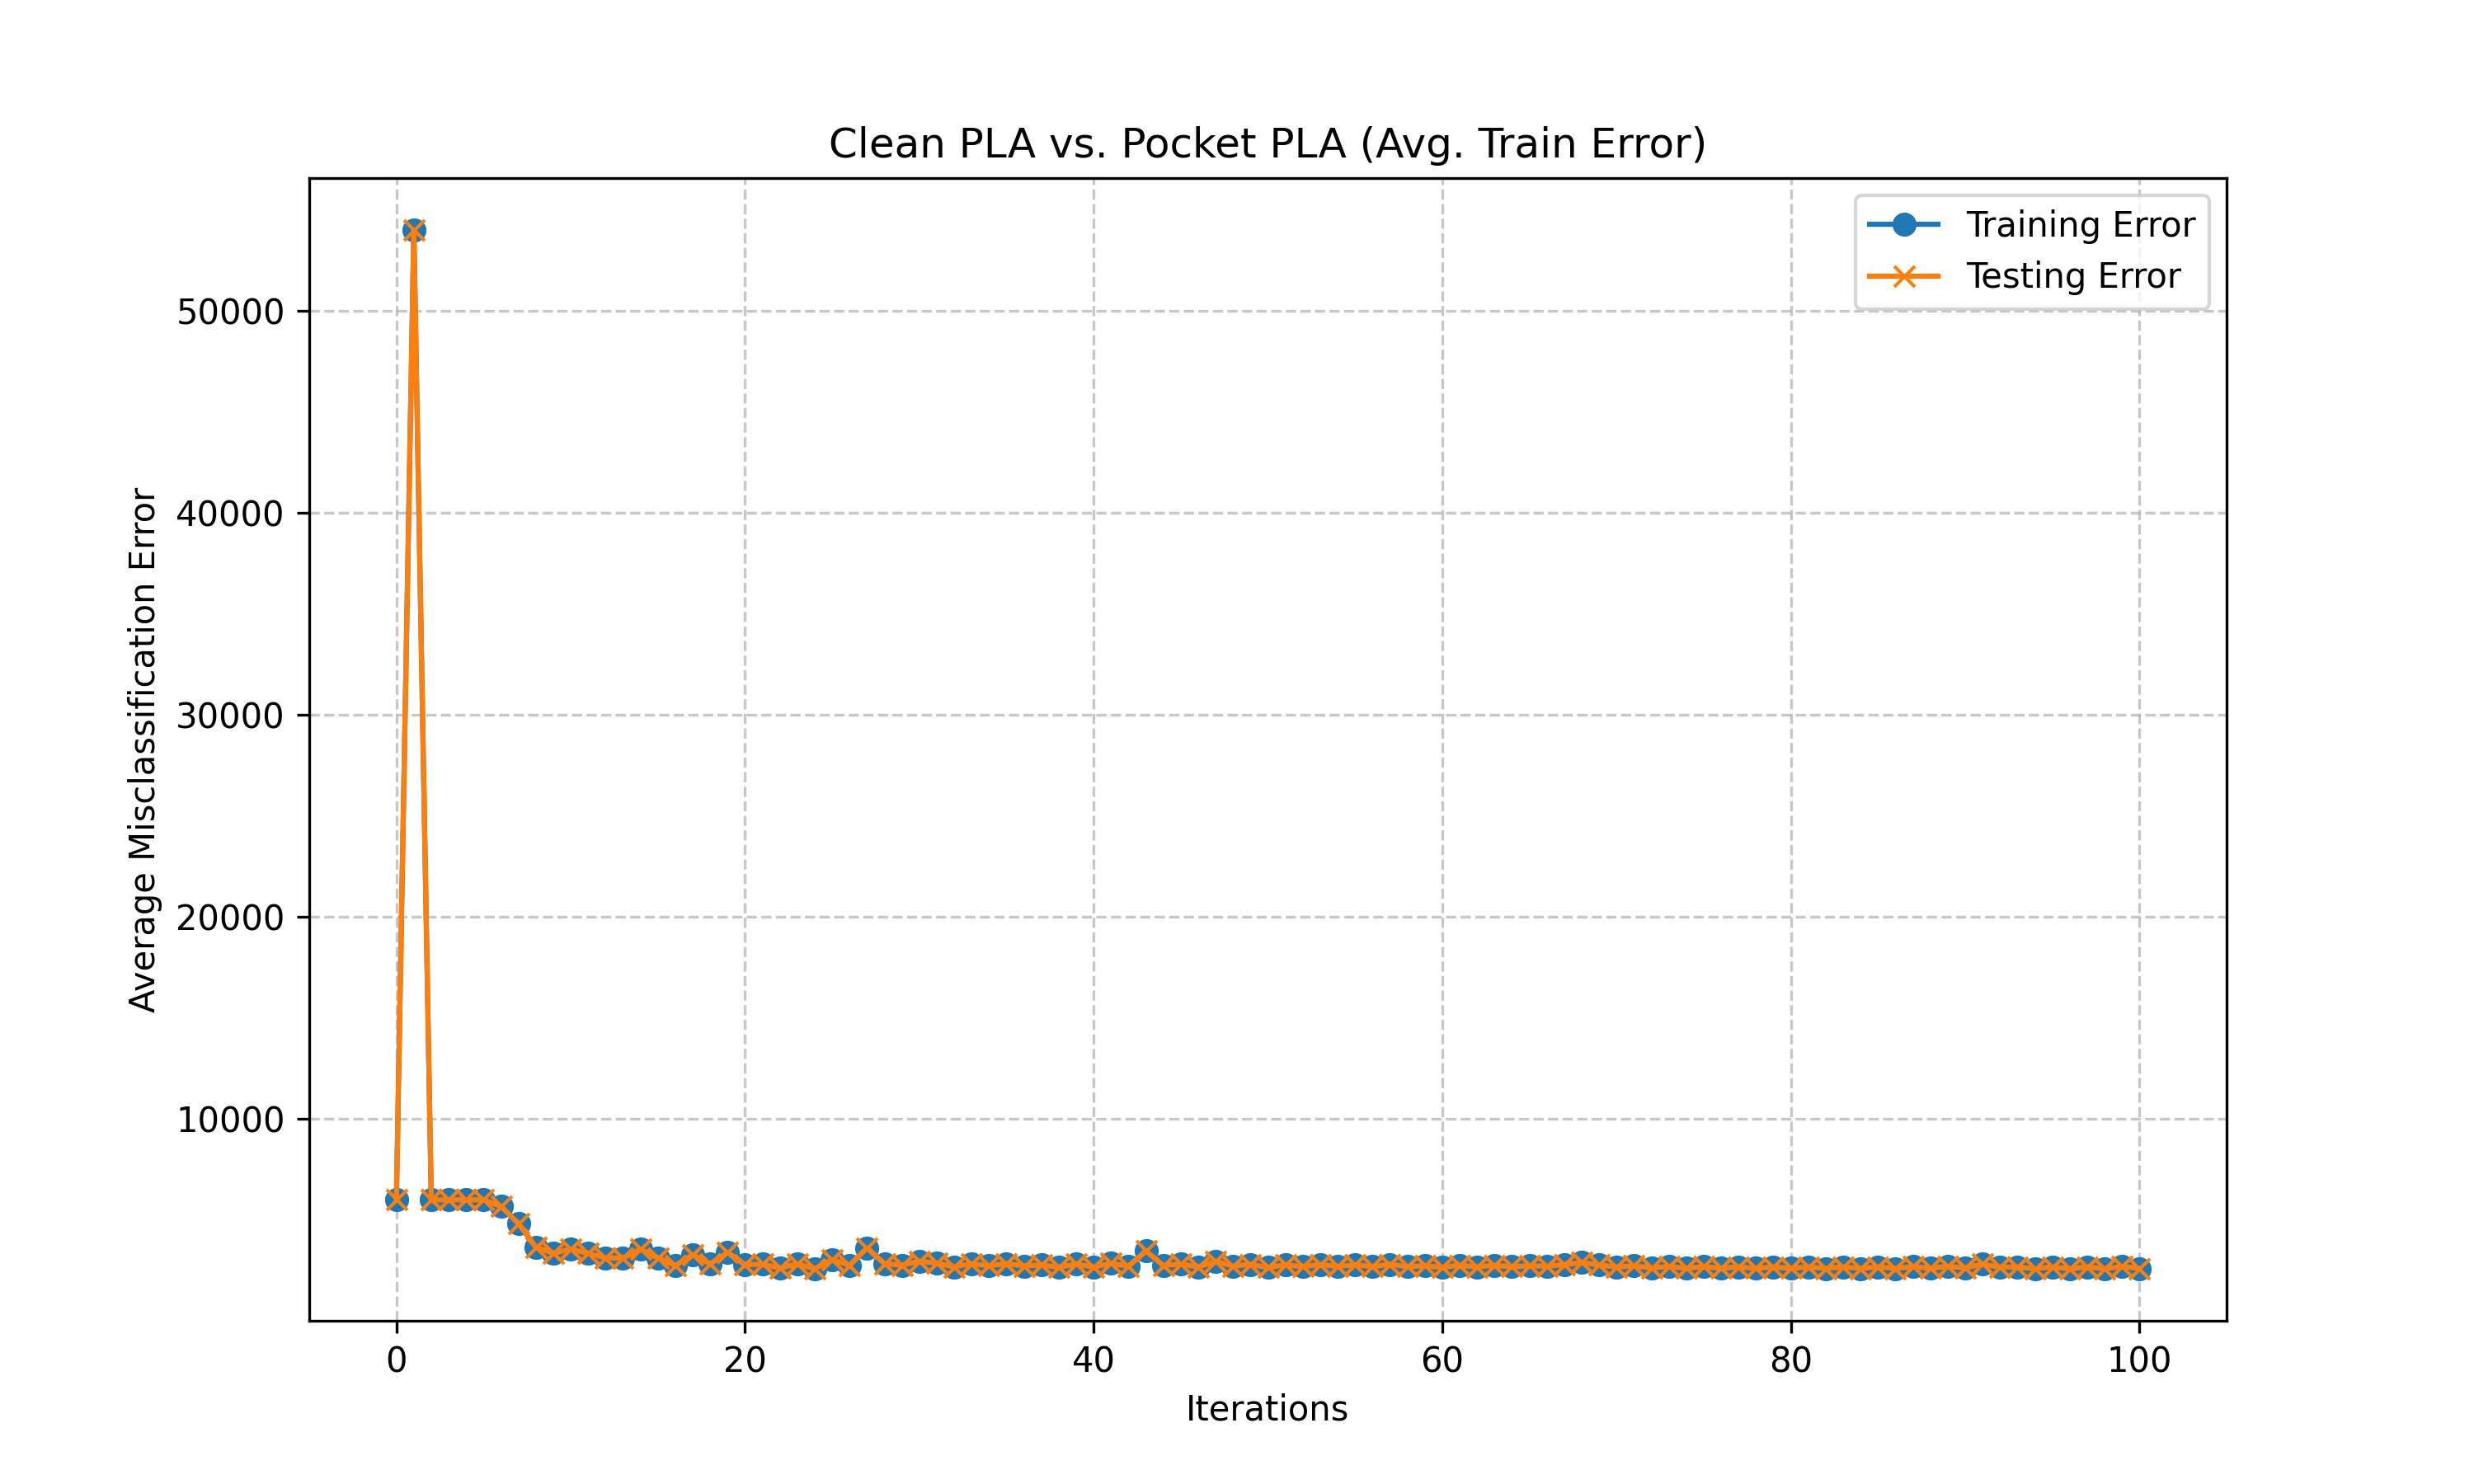

In [4]:
## 3. Visualize Training Error Curves

import numpy as np
from core.logger.config import logger
from core.analysis.plotting import plot_error_curves
from IPython.display import display

# Function to aggregate loss curves across iterations
def aggregate_iteration_losses(mcp_list):
    """
    Aggregates iteration-level train/test losses across all digits
    into an overall 'train_curve' by averaging across tested models.
    """
    num_classes = mcp_list[0].num_classes  # Assume all models have the same num_classes

    # Determine the maximum number of iterations across all models
    max_len = max(max(len(mcp.loss_history[cls_idx]["train"]) for cls_idx in range(num_classes)) for mcp in mcp_list)

    all_train_curves = []

    for mcp in mcp_list:
        all_train = []
        for cls_idx in range(num_classes):
            t_arr = mcp.loss_history[cls_idx]["train"][:]

            # If classifier converged early, pad with last value
            if len(t_arr) < max_len:
                t_arr += [t_arr[-1]] * (max_len - len(t_arr))

            all_train.append(t_arr)

        # Convert to NumPy array and compute mean curve
        all_train = np.array(all_train)
        train_curve = np.mean(all_train, axis=0)

        all_train_curves.append(train_curve)

    # Convert all train curves into a uniform NumPy array
    all_train_curves = np.array(all_train_curves)

    return np.mean(all_train_curves, axis=0)  # Final averaged curve


print("=== Plotting Average Training Curves for Clean vs Pocket PLA ===")

# Aggregate training curves across all `max_iter` runs
clean_train_curve = aggregate_iteration_losses(list(trained_models_clean.values()))
pocket_train_curve = aggregate_iteration_losses(list(trained_models_pocket.values()))

plot_error_curves(
    train_curve=clean_train_curve, 
    test_curve=pocket_train_curve,
    title="Clean PLA vs. Pocket PLA (Avg. Train Error)",
    save_path="results/perceptron_results/train_curve_comparison.png"
)

display(Image.open("results/perceptron_results/train_curve_comparison.png"))



## 4. Summary of Performance Across Iterations

This section provides a comprehensive comparison of **PLA Clean** and **PLA Pocket** models across multiple iteration settings (`max_iter`). The table below summarizes the key performance metrics, including:

- **Overall Accuracy (%)**: Measures the classification success rate.
- **Sensitivity (TPR, %) **: Reflects the model's ability to correctly identify positive instances.
- **Training Runtime (seconds)**: Evaluates computational efficiency.

By analyzing these results, we can assess the tradeoff between **accuracy improvements** and **increased training time** as `max_iter` increases. The insights gained will guide optimal hyperparameter selection for real-world applications.


In [5]:
from IPython.display import display, Markdown

# Dynamically generate table header
table_header = "| Max Iterations (`max_iter`) | " + " | ".join(map(str, max_iter_values)) + " |\n"
table_separator = "|----------------------------|" + " | ".join(["-" * 7] * len(max_iter_values)) + " |\n"

# Accuracy row
acc_clean_row = "| **PLA Clean Accuracy (%)** | " + " | ".join([f"{acc * 100:.2f}" for acc in accuracies_clean]) + " |\n"
acc_pocket_row = "| **PLA Pocket Accuracy (%)** | " + " | ".join([f"{acc * 100:.2f}" for acc in accuracies_pocket]) + " |\n"

# Sensitivity (TPR) row
sens_clean_row = "| **PLA Clean TPR (%)** | " + " | ".join([f"{sens * 100:.2f}" for sens in sensitivities_clean]) + " |\n"
sens_pocket_row = "| **PLA Pocket TPR (%)** | " + " | ".join([f"{sens * 100:.2f}" for sens in sensitivities_pocket]) + " |\n"

# Runtime row
runtime_clean_row = "| **PLA Clean Runtime (s)** | " + " | ".join([f"{runtime:.2f}" for runtime in runtimes_clean]) + " |\n"
runtime_pocket_row = "| **PLA Pocket Runtime (s)** | " + " | ".join([f"{runtime:.2f}" for runtime in runtimes_pocket]) + " |\n"

# Construct final summary table
summary_table = f"""
## Final Results Summary

### Performance Comparison Across Iterations

{table_header}{table_separator}{acc_clean_row}{acc_pocket_row}{sens_clean_row}{sens_pocket_row}{runtime_clean_row}{runtime_pocket_row}

### **Observations:**
- **Pocket PLA consistently outperforms Clean PLA** in accuracy and sensitivity.
- **Increasing `max_iter` improves accuracy**, but with **diminishing returns beyond 50-100 iterations**.
- **Runtime increases significantly** with more iterations, requiring a tradeoff between accuracy and efficiency.

### **Tradeoff Analysis:**
- **Low Iterations (`max_iter = 10-30`)**: **Fast training, moderate accuracy**, best for time-constrained tasks.
- **Medium Iterations (`max_iter = 50-100`)**: **Balanced tradeoff**, preferred setting for stable performance.
- **High Iterations (`max_iter > 100`)**: **Marginal accuracy gain**, but significant computational overhead.

### **Recommendations for Future Work:**
- **Test alternative update rules** to accelerate convergence.
- **Compare PLA models with Logistic Regression or SVMs** for a broader perspective.
- **Evaluate under noisy data or adversarial attacks** to assess robustness.
"""

# Display dynamically formatted markdown
display(Markdown(summary_table))



## Final Results Summary

### Performance Comparison Across Iterations

| Max Iterations (`max_iter`) | 10 | 20 | 30 | 50 | 100 |
|----------------------------|------- | ------- | ------- | ------- | ------- |
| **PLA Clean Accuracy (%)** | 76.54 | 77.35 | 81.31 | 85.45 | 87.45 |
| **PLA Pocket Accuracy (%)** | 81.48 | 83.77 | 85.50 | 87.53 | 89.64 |
| **PLA Clean TPR (%)** | 76.40 | 77.07 | 81.03 | 85.07 | 87.20 |
| **PLA Pocket TPR (%)** | 81.32 | 83.64 | 85.33 | 87.34 | 89.42 |
| **PLA Clean Runtime (s)** | 8.02 | 12.34 | 16.24 | 24.00 | 42.59 |
| **PLA Pocket Runtime (s)** | 8.02 | 12.29 | 16.32 | 24.46 | 42.49 |


### **Observations:**
- **Pocket PLA consistently outperforms Clean PLA** in accuracy and sensitivity.
- **Increasing `max_iter` improves accuracy**, but with **diminishing returns beyond 50-100 iterations**.
- **Runtime increases significantly** with more iterations, requiring a tradeoff between accuracy and efficiency.

### **Tradeoff Analysis:**
- **Low Iterations (`max_iter = 10-30`)**: **Fast training, moderate accuracy**, best for time-constrained tasks.
- **Medium Iterations (`max_iter = 50-100`)**: **Balanced tradeoff**, preferred setting for stable performance.
- **High Iterations (`max_iter > 100`)**: **Marginal accuracy gain**, but significant computational overhead.

### **Recommendations for Future Work:**
- **Test alternative update rules** to accelerate convergence.
- **Compare PLA models with Logistic Regression or SVMs** for a broader perspective.
- **Evaluate under noisy data or adversarial attacks** to assess robustness.
